Dataset from [Kaggle: Car information dataset](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset)

目的：機械学習の手法を用いて、将来的に自分の需要および好みに合う車を選定するための練習することが目的であります。

## 前処理

In [ ]:
#ライブラリをインポートする
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Google Driveに接続する
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#データセットを読み込む
data= pd.read_csv('/content/drive/MyDrive/Automobile.csv')

In [ ]:
#最初の幾つのデータセットを出力する
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [ ]:
#各列ごとに平均や標準偏差、最大値、最小値、最頻値などの要約統計量を取得する
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
#データセットの形状を示す
data.shape

(398, 9)

398行9列、データ量が結構多いですね。

In [ ]:
#データセットの要素の要素型を示す
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [ ]:
#データセットの列名を示す
data.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

自分は英語より日本語の方が得意のため、列の名前の日本語訳もつきます。

以下は日本語訳である。

目録([ 名前,燃費,気筒数,排気量,馬力,重量,加速度,モデル年,生産地 ])

## これからのコードの構成に関して
　データセットの列が結構多くて、全部の列について分析したら、結果が見づらくなるので、自分のいくつか興味のある列だけについて、分析させてもらいます。

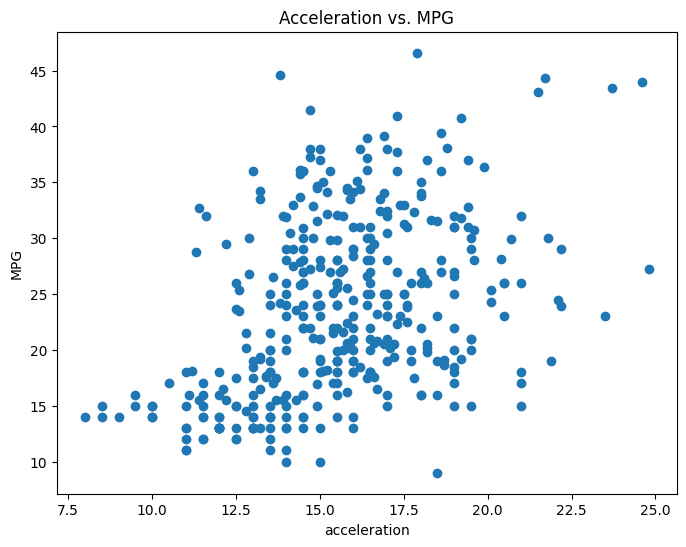

In [ ]:
#データを良く観察するために、エンジンの加速度と燃費の散布図を生成する
plt.figure(figsize=(8, 6))
plt.scatter(data['acceleration'], data['mpg'])
plt.xlabel('acceleration')
plt.ylabel('MPG')
plt.title('Acceleration vs. MPG')
plt.show()

加速度と燃費は一定的な関係性があるみたいが少々弱い気がしているので、ここでは、「特徴量を選び直した方が良いのか」か「SVMとかの方法を用いて、データを解析するのか」二択の中に迷っています。

ーーーーーーーーーーーーーーーーー


機械学習のレポートであるため、「SVMとかの方法を用いて、データを解析するのか」の方法を選択しました。

In [ ]:
#年式の特徴量も加えてみます。
import pandas as pd
df = pd.DataFrame(data)
df['model_year'] = data.model_year
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


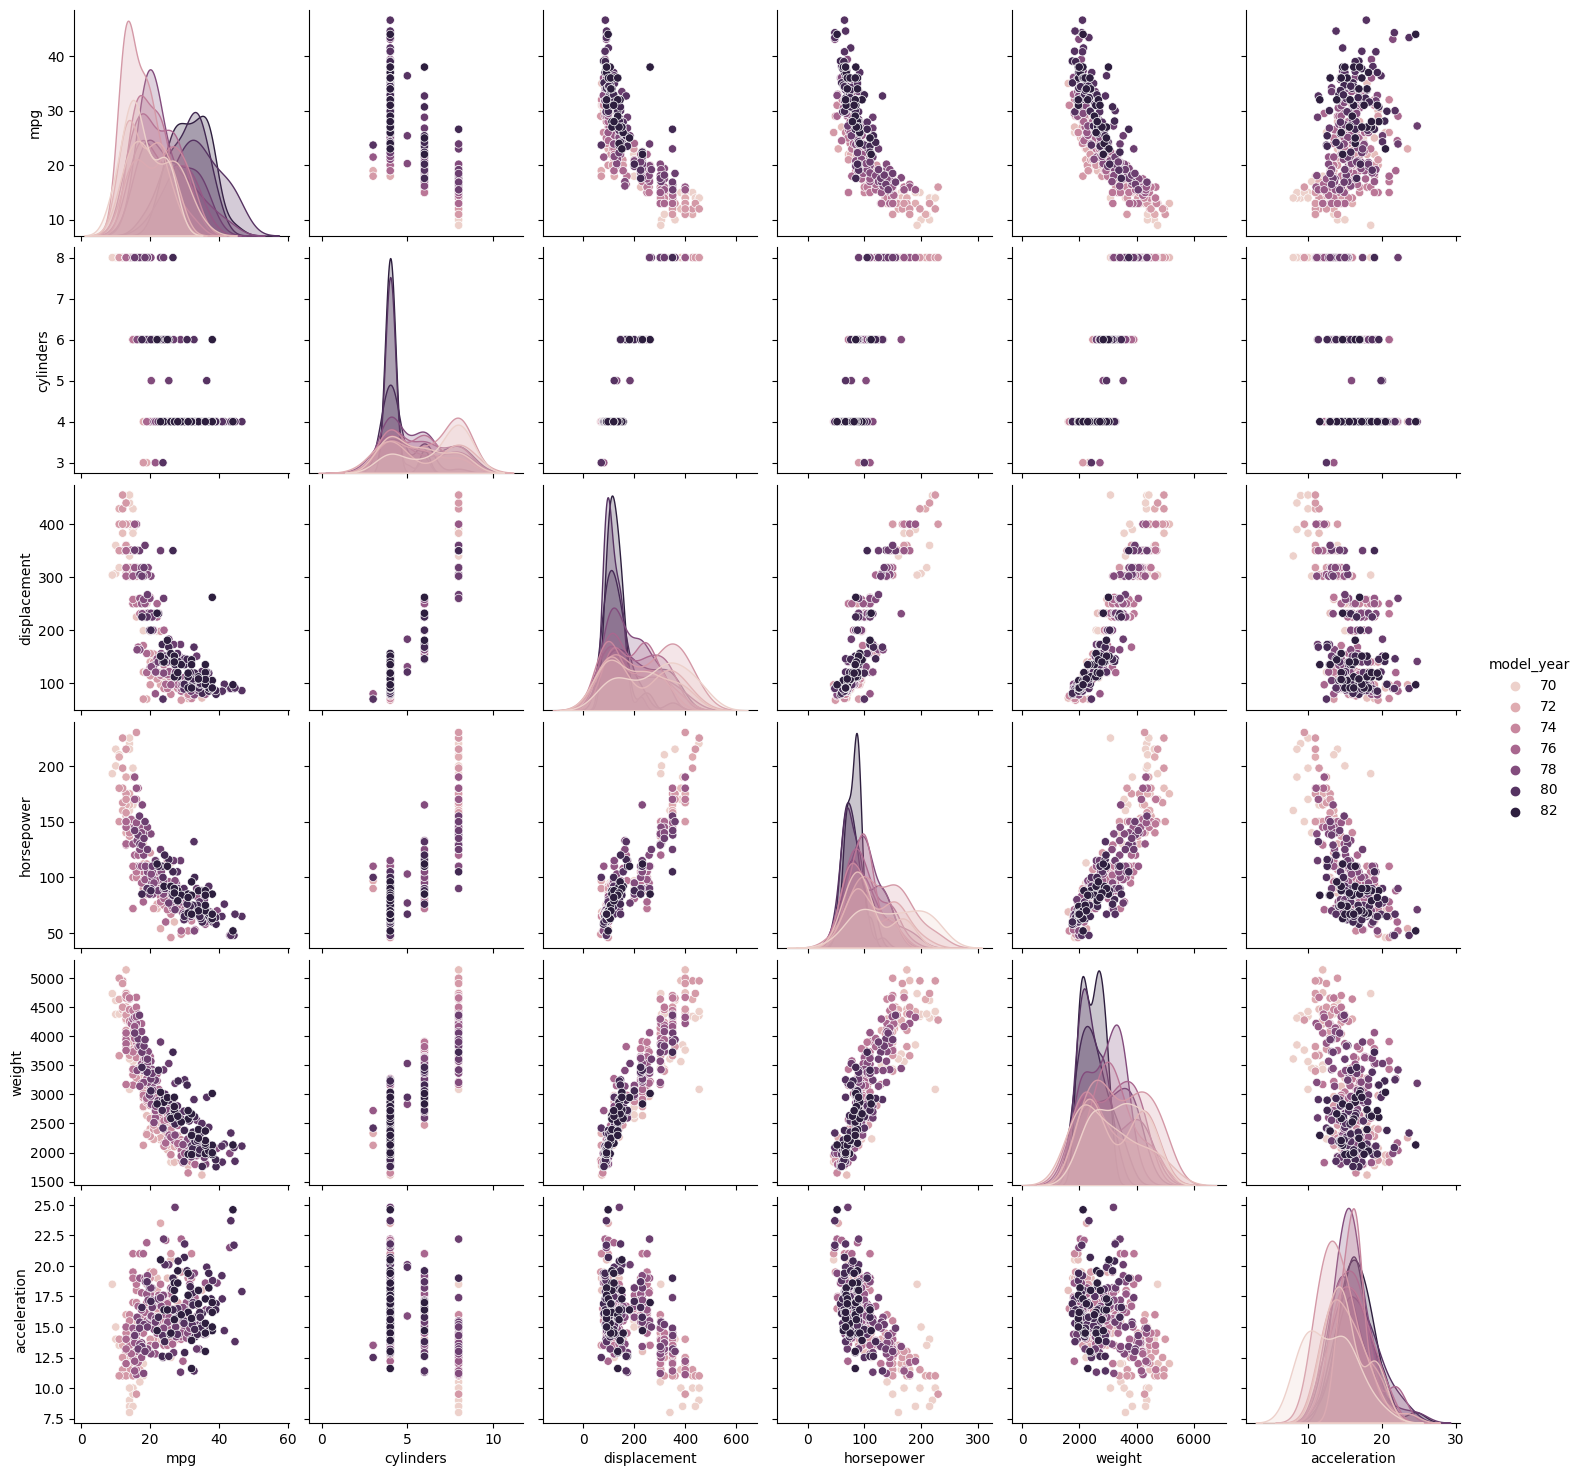

In [ ]:
#グラフで各特徴量の関係性をみてみましょう
import seaborn as sns
sns.pairplot(df, hue="model_year")

In [ ]:
from sklearn.model_selection import train_test_split

feature = df.loc[:, ['acceleration', 'mpg']]#　":"は行を全部取ってくる
model_year = df.loc[:, ['model_year']]

x_feature, y_feature, x_model_year, y_model_year = train_test_split(feature, model_year, train_size=0.8, random_state=3)
x_feature.head()

,acceleration,mpg
107,15.0,18.0
239,16.4,30.0
23,12.5,26.0
218,18.6,36.0
127,16.0,19.0


In [ ]:
from sklearn.preprocessing import StandardScaler

#(-3 ~ 3)
sc = StandardScaler()

#外れ値に強いの正規化
sc.fit(x_feature)#準備
x_feature_std = sc.transform(x_feature)
y_feature_std = sc.transform(y_feature)
print(x_feature_std)

[[-0.19754406 -0.68605878]
 [ 0.3024367   0.85593693]
 [-1.09036685  0.34193836]
 [ 1.08812076  1.62693478]
 [ 0.15958505 -0.55755914]
 [-1.59034761 -0.94305807]
 [ 2.90947925  2.57783214]
 [ 2.37378557  0.72743728]
 [-0.91180229 -0.94305807]
 [ 2.83805343 -0.04356057]
 [-0.55467318  0.59893764]
 [-1.26893141 -1.20005735]
 [-0.23325697  1.43418532]
 [ 1.94523064 -1.07155771]
 [-0.0189795   0.34193836]
 [ 0.15958505 -0.17206021]
 [-0.91180229 -1.328557  ]
 [-0.05469241  0.22628868]
 [-1.98318964 -1.07155771]
 [-0.55467318 -1.20005735]
 [-0.19754406  0.08493907]
 [-0.19754406 -0.55755914]
 [ 1.2309724  -0.17206021]
 [ 1.08812076  2.06383357]
 [-0.41182153  1.33138561]
 [ 0.87384329  0.34193836]
 [ 0.44528835  1.30568568]
 [-0.0189795   0.59893764]
 [-0.94751521  0.44473807]
 [ 0.15958505 -0.68605878]
 [-0.73323774  0.21343871]
 [ 0.15958505 -0.04356057]
 [ 0.3024367   1.63978475]
 [-0.73323774 -1.20005735]
 [-0.55467318 -1.71405592]
 [ 0.19529797  1.5112851 ]
 [-1.62606053 -1.58555628]
 

## 方法1: SVM

In [ ]:
from sklearn import svm
clf_s = svm.SVC(kernel='linear',C=1)
clf_s.fit(x_feature_std, x_model_year)
predicted = clf_s.predict(y_feature_std)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_model_year, predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2],
       [0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 2, 2]])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


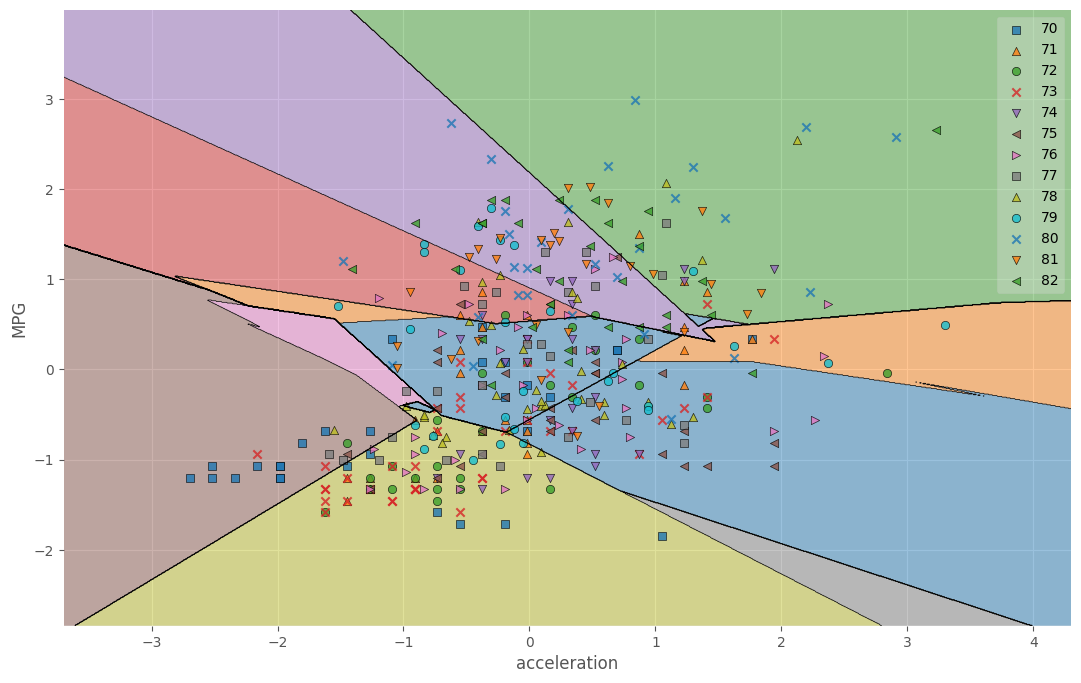

In [ ]:
#SVMの可視化をさせます。
!pip install mlxtend --upgrade --no-deps
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')

feature_combined_std = np.vstack((x_feature_std, y_feature_std))
model_year_combined = np.hstack((x_model_year.values.T, y_model_year.values.T))
model_year_combined = np.reshape(model_year_combined,(-1))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(feature_combined_std, model_year_combined, clf=clf_s)
plt.xlabel('acceleration')
plt.ylabel('MPG')
plt.show()

右上部分には年式が新しくて、燃費も加速度もいい車なので、買うとしたら、その辺の車を買おうと思います。
他の年式、燃費と加速度のどちらが良くないことがある車を簡単に排除できるようになりました。

## 方法2: 決定木をやってみます。

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_feature, x_model_year)
predicted = clf.predict(y_feature)#yの特徴量を入力し、予測する
from sklearn.metrics import confusion_matrix
confusion_matrix(y_model_year,predicted)#yの特徴量と予測を比べる

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1],
       [2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 3, 1, 1]])

In [ ]:
!pip install pydotplus
!pip install graphviz
!apt-get install graphviz
!pip install six

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import pydotplus
from IPython.display import Image
from six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.827303 to fit



見づらいですので、他の方法を試します。

## 方法3: scikit-learn でクラスタ分析 (K-means 法)

自分は車の加速度、燃費および年式の三つの要素にしか興味がないですので、ここから、要素を絞りたいと思います。

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Automobile.csv')

燃費と加速度をそれぞれ一定値以上に設定しました。そして、万が一車が壊れた場合に修理に困らないために、生産地を日本に絞ります。

In [ ]:
df1=df[(df['mpg'] >= 15) & (df['acceleration'] >= 15) & (df['origin']== 'japan')]

In [ ]:
df1.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan
53,toyota corolla 1200,31.0,4,71.0,65.0,1773,19.0,71,japan
54,datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,japan
57,toyota corona hardtop,24.0,4,113.0,95.0,2278,15.5,72,japan
81,datsun 510 (sw),28.0,4,97.0,92.0,2288,17.0,72,japan


In [ ]:
df2=df1.drop(['cylinders', 'weight', 'displacement', 'horsepower', 'model_year', 'origin'],axis=1)

In [ ]:
df2.head()

,name,mpg,acceleration
14,toyota corona mark ii,24.0,15.0
53,toyota corolla 1200,31.0,19.0
54,datsun 1200,35.0,18.0
57,toyota corona hardtop,24.0,15.5
81,datsun 510 (sw),28.0,17.0


In [ ]:
df2.shape

(55, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Pandas のデータフレームから Numpy の行列 (Array) に変換
df2_array = np.array([df2['mpg'].tolist(),
                      df2['acceleration'].tolist(),
                       ], np.int32)

In [ ]:
# 行列を転置
df2_array = df2_array.T

In [ ]:
# クラスタ分析を実行 (クラスタ数=10)
pred = KMeans(n_clusters=10).fit_predict(df2_array)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([9, 4, 0, 9, 1, 1, 8, 2, 4, 4, 6, 4, 9, 9, 1, 9, 6, 6, 6, 1, 2, 4,
       6, 9, 1, 4, 3, 0, 1, 0, 4, 3, 7, 1, 6, 7, 6, 5, 3, 6, 6, 7, 0, 6,
       3, 7, 0, 6, 4, 3, 6, 0, 7, 6, 7], dtype=int32)

In [ ]:
# Pandas のデータフレームにクラスタ番号を追加
df2['cluster_id']=pred
df2.head()

,name,mpg,acceleration,cluster_id
14,toyota corona mark ii,24.0,15.0,9
53,toyota corolla 1200,31.0,19.0,4
54,datsun 1200,35.0,18.0,0
57,toyota corona hardtop,24.0,15.5,9
81,datsun 510 (sw),28.0,17.0,1


In [ ]:
# 各クラスタに属するサンプル数の分布
df2['cluster_id'].value_counts()

6    13
4     8
1     7
9     6
0     6
7     6
3     5
2     2
8     1
5     1
Name: cluster_id, dtype: int64

In [ ]:
# 各クラスタの平均値
for i in range(10):
  ave=df2[df2['cluster_id']==i].mean() # クラスタ番号 = i (0~9)
  print(ave)

mpg             34.733333
acceleration    16.433333
cluster_id       0.000000
dtype: float64
mpg             28.757143
acceleration    16.342857
cluster_id       1.000000
dtype: float64
mpg             20.5
acceleration    16.0
cluster_id       2.0
dtype: float64
mpg             38.46
acceleration    18.84
cluster_id       3.00
dtype: float64
mpg             31.7125
acceleration    19.1750
cluster_id       4.0000
dtype: float64
mpg             46.6
acceleration    17.9
cluster_id       5.0
dtype: float64
mpg             32.300000
acceleration    16.984615
cluster_id       6.000000
dtype: float64
mpg             37.833333
acceleration    16.133333
cluster_id       7.000000
dtype: float64
mpg             20.0
acceleration    19.0
cluster_id       8.0
dtype: float64
mpg             24.666667
acceleration    16.033333
cluster_id       9.000000
dtype: float64


<ipython-input-31-3c30823302b8>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ave=df2[df2['cluster_id']==i].mean() # クラスタ番号 = i (0~9)
<ipython-input-31-3c30823302b8>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ave=df2[df2['cluster_id']==i].mean() # クラスタ番号 = i (0~9)
<ipython-input-31-3c30823302b8>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify th

<ipython-input-32-6dfd613abd17>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clusterinfo['c' + str(i)] = df2[df2['cluster_id'] == i].mean()
<ipython-input-32-6dfd613abd17>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clusterinfo['c' + str(i)] = df2[df2['cluster_id'] == i].mean()
<ipython-input-32-6dfd613abd17>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns

[Text(0, 0, 'c0'),
 Text(1, 0, 'c1'),
 Text(2, 0, 'c2'),
 Text(3, 0, 'c3'),
 Text(4, 0, 'c4'),
 Text(5, 0, 'c5'),
 Text(6, 0, 'c6'),
 Text(7, 0, 'c7'),
 Text(8, 0, 'c8'),
 Text(9, 0, 'c9')]

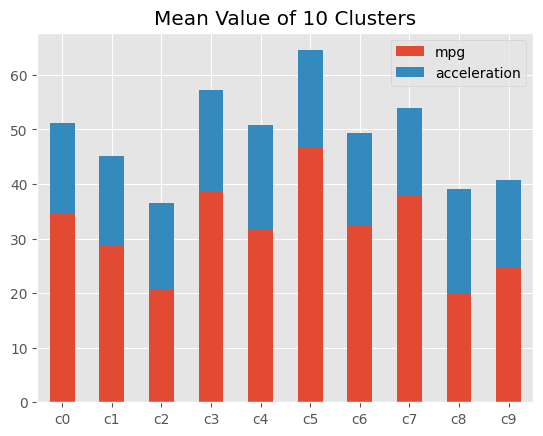

In [ ]:
# 可視化（積み上げ棒グラフ）
clusterinfo = pd.DataFrame()
for i in range(10):
    clusterinfo['c' + str(i)] = df2[df2['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 10 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

棒が一番高かったクラス（毎回違う）の車の燃費と加速度の平均的な総合機能が一番良いので、その中から選びたいと思います。

## 決定木再チャレンジ

なるべくコスパがよい車がいいので、条件を加えます。

In [ ]:
df3=df[(df['mpg'] >= 35) & (df['acceleration'] >= 15) & (df['origin']== 'japan')]

情報量が多くなると決定木が非常に見づらくなるので、自分が気にしていない要素（気筒数,排気量,馬力,重量,モデル年）を削除します。

In [ ]:
df4=df3.drop(['cylinders', 'weight', 'displacement', 'horsepower',  'origin'],axis=1)

残りの車の数が少ないので、全部出力します。

In [ ]:
df4

,name,mpg,acceleration,model_year
54,datsun 1200,35.0,18.0,71
247,datsun b210 gx,39.4,18.6,78
248,honda civic cvcc,36.1,16.4,78
310,toyota corolla tercel,38.1,18.8,80
312,datsun 310,37.2,16.4,80
320,datsun 510 hatchback,37.0,15.0,80
322,mazda glc,46.6,17.9,80
324,datsun 210,40.8,19.2,80
343,toyota starlet,39.1,16.9,81
345,honda civic 1300,35.1,16.1,81


In [ ]:
feature = df4.loc[:, ['acceleration', 'mpg']]#　":"は行を全部取ってくる
model_year = df4.loc[:, ['model_year']]

x_feature, y_feature, x_model_year, y_model_year = train_test_split(feature, model_year, train_size=0.8, random_state=3)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_feature, x_model_year)
predicted = clf.predict(y_feature)#yの特徴量を入力し、予測する
from sklearn.metrics import confusion_matrix
confusion_matrix(y_model_year,predicted)#yの特徴量と予測を比べる

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

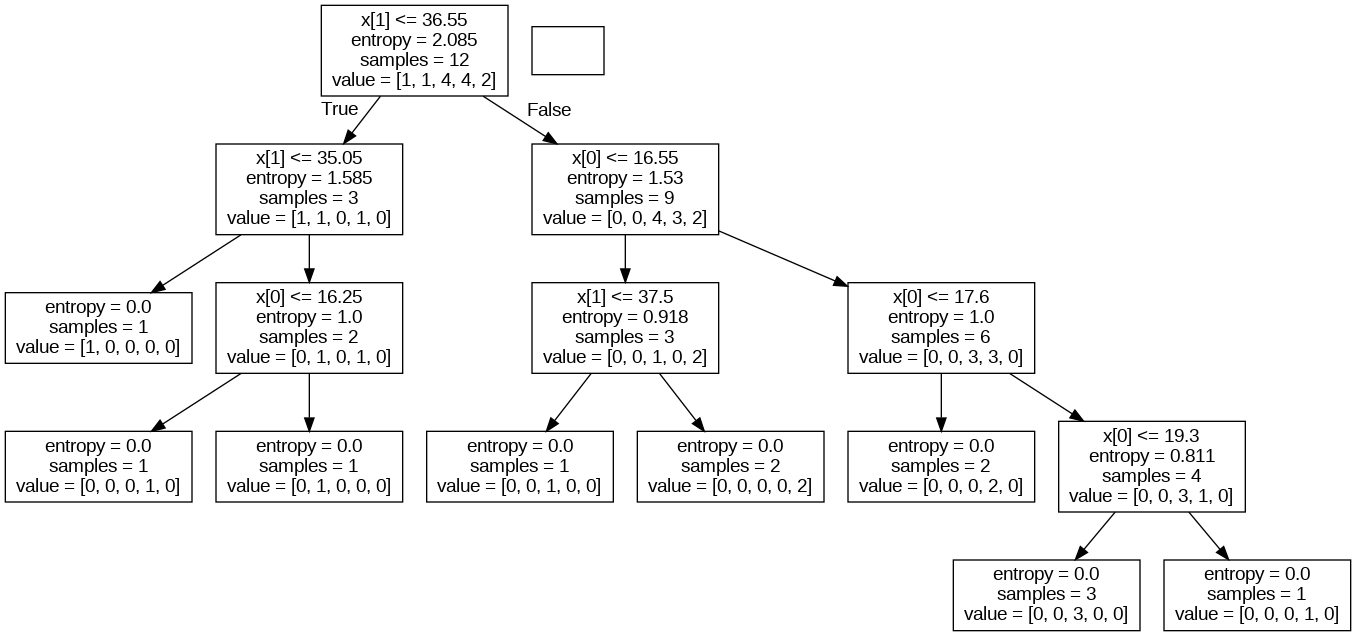

In [ ]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

やはり、わかりにくいです。K-meansとSVMの方が選びやすいです。

## 結論

　今回はSVM, K-means, 決定木の三種類の方法を用いて、燃費、加速度と生産地（場合によって年式の条件も加えた）がよい車のデータを分析してみました。
　SVMのマージン最大化により、データをわかりやすくいくつかのグループに分けられました。
　k-means法で、まずデータを適当なクラスタに分けた後、クラスタの平均を用いてうまい具合にデータがわかれるように調整させていきました。
　結果的に、SVMとK-meansの分析結果がわりとわかりやすかったです。その結果から見るとdatsunのブランドの車が比較的によかったです。